# Implementación básica del clasificador Naive-Bayes

## Pasos en la implementación de Naive-Bayes
* **Procesamiento de los datos**: Involucra todo el procedimiento de limpieza y
transformación de los datos en crudo. Puede incluir reducir el ruido (variabilidad), manejar datos faltantes y normalización de datos.

* **Extracción de características**: Proceso de selección y creación de las características a  partir del data set. En el caso de la clasiciación de textos, las características pueden ser el número de veces que se repiten palabras específicas en una frase.

* **Entrenamiento del Modelo**: En este paso se estiman los parámetros del Naive-Bayes utilizando el conjunto de entrenamiento. Se calculan las probabilidades condicionales requeridas para cada clase.

* **Evaluación del Modelo**: Se evalua la precisión del modelo ante nuevos datos. Las métricas de evaluación estándar incluyen la precisión, accuracy, F1-Score y la matriz de confunsión del modelo




## Ejemplo Naive-Bayes Gaussiano Básico
A continuación se desarrolla la implementación de un un caso sencillo y básico de Naive-Bayes Gaussiano con datos fíctícios.

### Importación de Librerías

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


### Carga de los datos y análisis exploratorio


*   Generamos un data set cargando los datos de prueba populares de Iris.
*   El data set consiste en 3 tipos diferentes de lirios (Setosa, Versicolour and Virginica) y las longitudes y anchuras de sus pétalos y sépalos. Se trata de un df 150x4)



In [3]:
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Variable objetivo

In [4]:

#iris.data
#iris.target

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
df.shape

(150, 5)

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


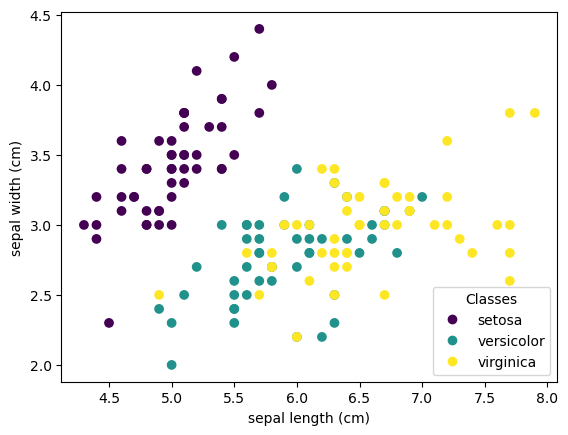

In [8]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

### Creación y Entrenamiento del modelo Naive-Bayes

* Aquí utilizamos un modelo de Naive-Bayes Gaussiano, asumiendo que las características se distribuyen como una Normal. El modelo obtiene la media y varianza muestrales para cada clase y, mediante la función de densidad gaussiana, calcula las verosimilitudes y las probabilidades a priori.


In [9]:
# Creating an instance of the Naive Bayes classifier
model = GaussianNB()

Podemos especificar un valor para las probabilidades a priori con el parámetro *priors* en un array, si no especificamos nada, calcula las a prioris sobre los datos.

In [10]:
# Training the model using the training data
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [11]:
# Making predictions on the test data
y_pred = model.predict(X_test)

### Evaluación del modelo
Vemos diferentes métodos de evaluar el modelo

In [12]:
#Evaluamos el rendimiento del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Columnas son predicciones de cada clase y filas valores reales de cada clase. De la matriz de confusión se calculan las métricas de precisión del modelo

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30





* **Precision:** Mide la precisión de las predicciones positivas. (Porcentaje de predicciones positivas correctas) De los casos en los que nuestro modelo clasificó como positivo, ¿qué porcentaje son realmente positivos? Precission = VP/(VP + FP)
* **Recall:** Mide la capacidad del modelo para capturar instancias positivas. (Porcentaje de casos positivos detectados) De los casos positivos en nuestro propio DataSet, ¿qué porcentaje nuestro modelo los clasificó como positivos? Recall = TP/(TP + FN)
* **F1-Score:** Proporciona un equilibrio entre precision y recall.
Si aumentamos la precisión, perderemos recall y viceversa. Hay que interpretar que nos interesa más en nuestro modelo según qué problema estemos modelizando y qué error sea menos costoso.

* **Support:** Muestra la cantidad de instancias reales de cada clase.



---


Se trata de un ejemplo secillo con datos simulados, por este motivo, el modelo clasifica a la perfección. En un problema real, tendremos registros mal clasificados y tendremos que decidir si nos interesa un modelo con mayor precisión o con mejor sensibilidad (recall), balanceando entre ambas métricas.


